In [8]:
import numpy as np

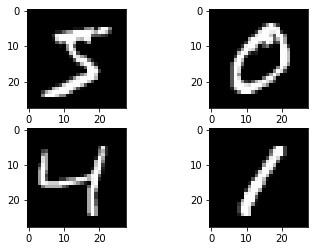

In [9]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()


In [10]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)


In [11]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [12]:
from keras.utils import np_utils
# one hot encode outputs
Y_test = y_test
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
#Baseline: hidden_layer_nodes=50 
#hidden_layer_nodes=50
hidden_layer_nodes=65
hidden_layer_nodes2=20
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(hidden_layer_nodes, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(hidden_layer_nodes, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(hidden_layer_nodes2, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    #sgd = optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
    #model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

    return model



In [22]:
model = baseline_model()
# Fit the model
nn_simple = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/30
300/300 [==============================] - 2s 7ms/step - loss: 0.2213 - accuracy: 0.1044 - val_loss: 0.1925 - val_accuracy: 0.1028
Epoch 2/30
300/300 [==============================] - 2s 6ms/step - loss: 0.1718 - accuracy: 0.1044 - val_loss: 0.1541 - val_accuracy: 0.1028
Epoch 3/30
300/300 [==============================] - 2s 6ms/step - loss: 0.1416 - accuracy: 0.1044 - val_loss: 0.1310 - val_accuracy: 0.1028
Epoch 4/30
300/300 [==============================] - 2s 6ms/step - loss: 0.1235 - accuracy: 0.1044 - val_loss: 0.1170 - val_accuracy: 0.1028
Epoch 5/30
300/300 [==============================] - 2s 6ms/step - loss: 0.1124 - accuracy: 0.1044 - val_loss: 0.1084 - val_accuracy: 0.1028
Epoch 6/30
300/300 [==============================] - 2s 6ms/step - loss: 0.1055 - accuracy: 0.1044 - val_loss: 0.1029 - val_accuracy: 0.1028
Epoch 7/30
300/300 [==============================] - 2s 6ms/step - loss: 0.1010 - accuracy: 0.1044 - val_loss: 0.0994 - val_accuracy: 0.1028
Epoch 

In [19]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

313/313 - 1s - loss: 0.1305 - accuracy: 0.0958
Baseline Error: 90.42%
Baseline Accuracy: 9.58%


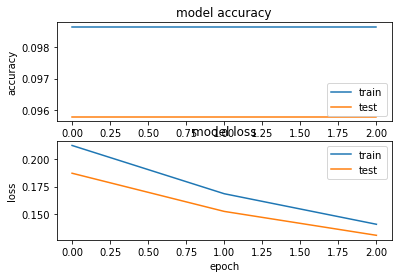

In [20]:
plt.subplot(2,1,1)
plt.plot(nn_simple.history['accuracy'])
plt.plot(nn_simple.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(nn_simple.history['loss'])
plt.plot(nn_simple.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

958  classified correctly
9042  classified incorrectly


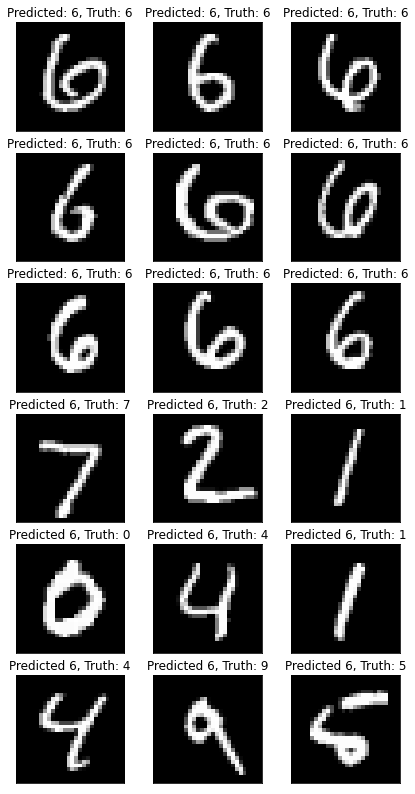

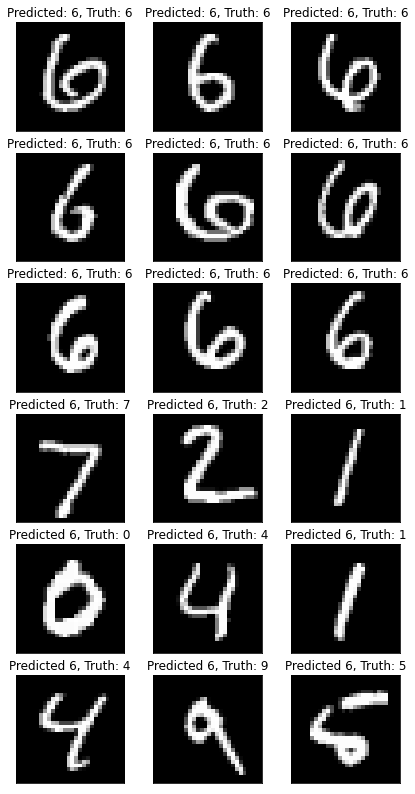

In [21]:
import numpy as np
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        Y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       Y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation